# Principal Component Analysis

In [1]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
# importing or loading the dataset 
dataset = pd.read_csv('C:/Users/Classroom/Desktop/Ann/USL/Dimensionality_Reduction/PCA/data/wines.csv') 
  
# distributing the dataset into two components X and Y 
# X = dataset.iloc[:, 0:13].values 
# y = dataset.iloc[:, 13].values 


#split the data and the target
X = dataset.drop('Wine', 1)  
y = dataset['Wine'] 



In [3]:
#dataset.describe()
dataset.info() # 14 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Wine                    178 non-null int64
Alcohol                 178 non-null float64
Malic.acid              178 non-null float64
Ash                     178 non-null float64
Acl                     178 non-null float64
Mg                      178 non-null int64
Phenols                 178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid.phenols    178 non-null float64
Proanth                 178 non-null float64
Color.int               178 non-null float64
Hue                     178 non-null float64
OD                      178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 

In [5]:
#Feature scaling
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## PCA using all features

In [6]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA

#pca = PCA(n_components = 2)
# with all features as input ( 14 features)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [7]:
# Fitting Logistic Regression To the training set  and predict with test data


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [8]:
# making confusion matrix between 
#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Accuracy : 1.0


In [9]:
pca.explained_variance_ratio_

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

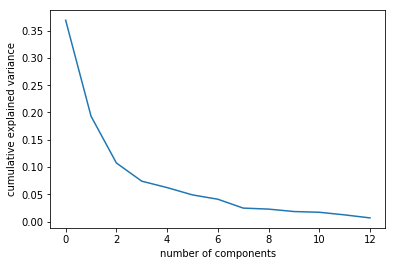

In [10]:
#SCREE PLOT
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### PCA using 2 feature

In [11]:
## PCA using 2 features

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

## 97.22% accuracy

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Accuracy : 0.9722222222222222


## PCA using 3 features

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


#Feature scaling
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## PCA using 3 features

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

## 100 % accuracy

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Accuracy : 1.0


In [13]:
pca.explained_variance_ratio_

array([0.36884109, 0.19318394, 0.10752862])

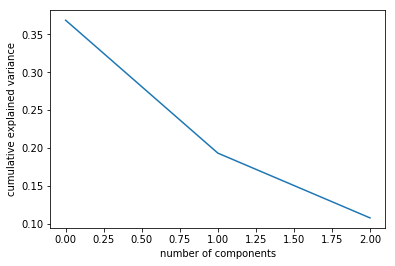

In [14]:
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Inference : 
Using all the features  in the model gives accuracy 100% accuracy

Using 2 features  in the model gives accuracy 97 % accuracy

Using 3 features  in the model gives accuracy 100 % accuracy

Its better to use 3 featyres instead of all

In [15]:
import  pandas as pd
# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3']))

       Alcohol  Malic.acid       Ash       Acl        Mg   Phenols  \
PC-1  0.129600   -0.244641 -0.010189 -0.240516  0.126495  0.389441   
PC-2 -0.498073   -0.231685 -0.314969  0.023218 -0.258420 -0.100685   
PC-3  0.138382   -0.084224 -0.639882 -0.621950 -0.029978 -0.171157   

      Flavanoids  Nonflavanoid.phenols   Proanth  Color.int       Hue  \
PC-1    0.427578             -0.305057  0.307753  -0.110272  0.307105   
PC-2   -0.020980             -0.039906 -0.067460  -0.530871  0.271617   
PC-3   -0.124642             -0.171005 -0.151553   0.146128 -0.106927   

            OD   Proline  
PC-1  0.376362  0.281109  
PC-2  0.160712 -0.365473  
PC-3 -0.171442  0.131782  
